### Question 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

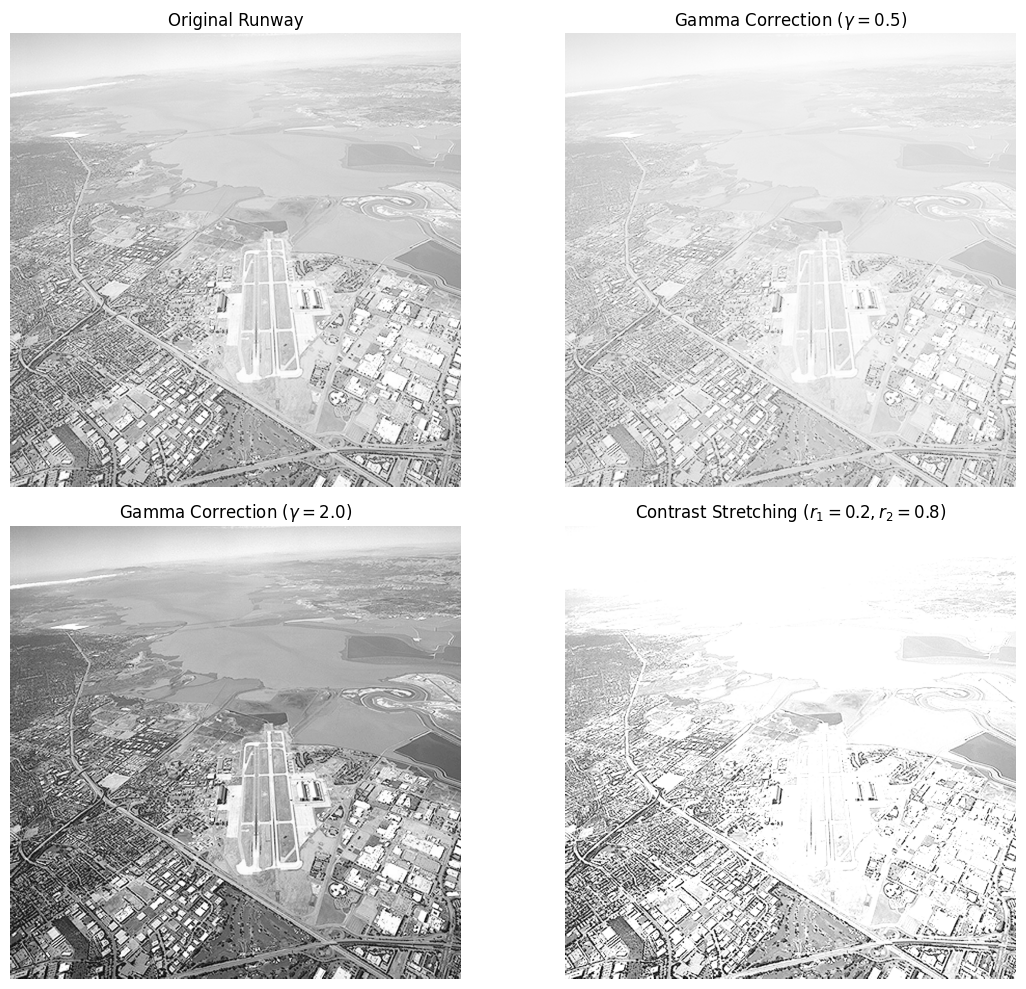

In [2]:

# 1. Load the runway image
# IMPORTANT: Make sure this file exists in your project folder!
file_path = 'runway.png' 

if not os.path.exists(file_path):
    print(f"ERROR: File '{file_path}' not found. Please check the filename and folder.")
else:
    img_runway = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    if img_runway is None:
        print("ERROR: Image could not be decoded. Check if the file is corrupted.")
    else:
        # Normalize image to range [0, 1] as required
        r = img_runway.astype(np.float32) / 255.0

        # (a) Gamma Correction gamma = 0.5
        gamma_05 = np.power(r, 0.5)

        # (b) Gamma Correction gamma = 2.0
        gamma_20 = np.power(r, 2.0)

        # (c) Contrast Stretching
        r1, r2 = 0.2, 0.8
        s_contrast = np.piecewise(r, 
            [r < r1, (r >= r1) & (r <= r2), r > r2],
            [0, lambda x: (x - r1) / (r2 - r1), 1])

        # Plotting - Note the 'r' before titles to fix SyntaxWarning
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        axes[0, 0].imshow(r, cmap='gray')
        axes[0, 0].set_title("Original Runway")

        axes[0, 1].imshow(gamma_05, cmap='gray')
        axes[0, 1].set_title(r"Gamma Correction ($\gamma=0.5$)")

        axes[1, 0].imshow(gamma_20, cmap='gray')
        axes[1, 0].set_title(r"Gamma Correction ($\gamma=2.0$)")

        axes[1, 1].imshow(s_contrast, cmap='gray')
        axes[1, 1].set_title(r"Contrast Stretching ($r_1=0.2, r_2=0.8$)")

        for ax in axes.flat:
            ax.axis('off')

        plt.tight_layout()
        plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\g'
<>:31: SyntaxWarning: invalid escape sequence '\g'
C:\Users\buwan\AppData\Local\Temp\ipykernel_20792\2862410092.py:31: SyntaxWarning: invalid escape sequence '\g'
  axes[0, 1].set_title(f"Corrected L-Plane ($\gamma={gamma_val}$)")


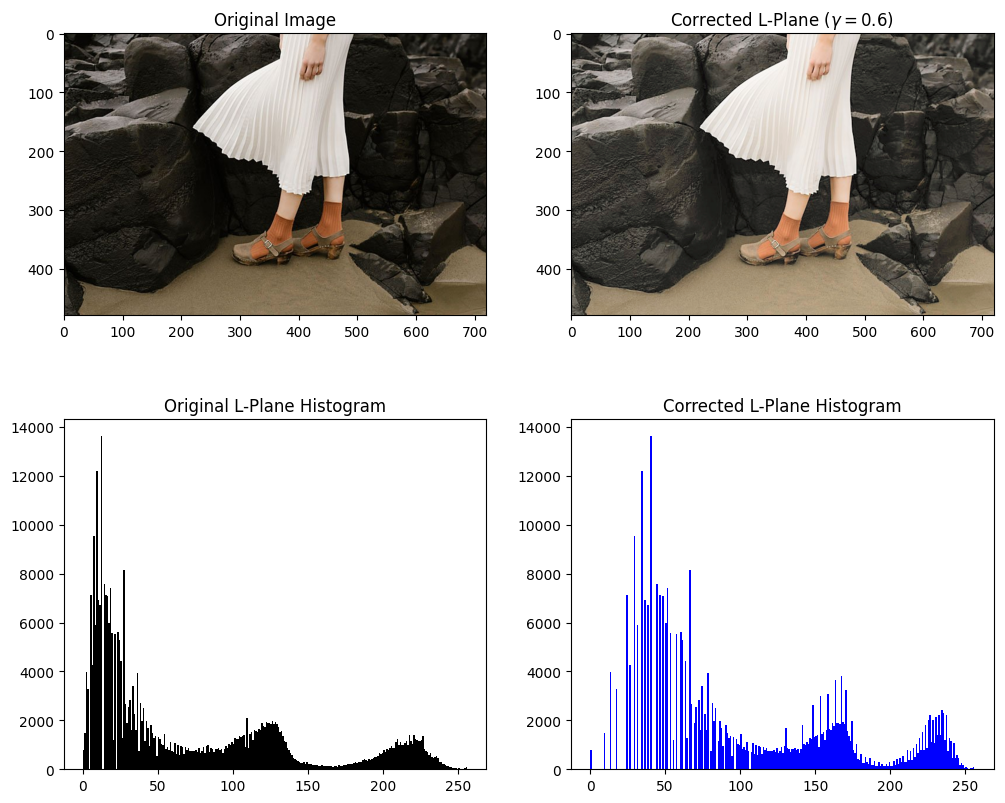

In [4]:
# 2. Load the color image for Figure 2
img_color = cv2.imread('highlights_and_shadows.jpg') # Replace with your filename
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Convert to L*a*b* space
img_lab = cv2.cvtColor(img_color, cv2.COLOR_BGR2Lab)
l_plane, a_plane, b_plane = cv2.split(img_lab)

# Normalize L plane for processing (range 0-1)
# L plane in OpenCV is typically 0-255 for 8-bit images
l_normalized = l_plane.astype(np.float32) / 255.0

# (a) Apply Gamma Correction to L plane (Example gamma = 0.6)
gamma_val = 0.6 
l_corrected = np.power(l_normalized, gamma_val)

# Convert back to 0-255 range
l_final = (l_corrected * 255).astype(np.uint8)

# Merge back and convert to RGB for display
img_lab_corrected = cv2.merge([l_final, a_plane, b_plane])
img_corrected_rgb = cv2.cvtColor(img_lab_corrected, cv2.COLOR_Lab2RGB)

# (b) Show Histograms and Comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display Images
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(img_corrected_rgb)
axes[0, 1].set_title(f"Corrected L-Plane ($\gamma={gamma_val}$)")

# Plot Histograms
axes[1, 0].hist(l_plane.ravel(), bins=256, color='black', range=[0, 256])
axes[1, 0].set_title("Original L-Plane Histogram")
axes[1, 1].hist(l_final.ravel(), bins=256, color='blue', range=[0, 256])
axes[1, 1].set_title("Corrected L-Plane Histogram")

plt.show()